<a href="https://colab.research.google.com/github/Tejaswidarsi/LDA/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab Exercise 1: Introduction to LDA for Dimensionality Reduction
Objective: Understand the basic principles of LDA and apply it to reduce the dimensionality of a simple classification dataset.
Instructions:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Step 1: Load the Dataset
iris = load_iris()
X = iris.data
y = iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
# Step 2: Data Standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

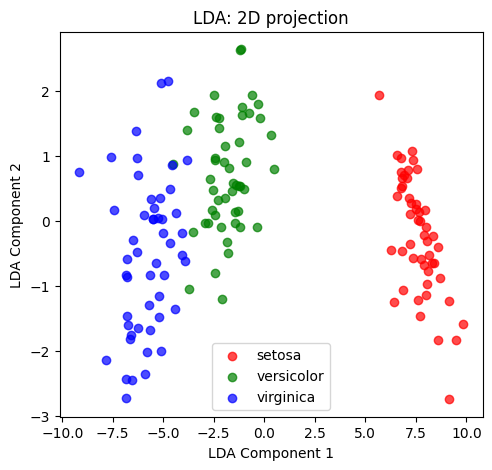

In [4]:
# Step 3: Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y)

# Step 4: Visualization for LDA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.7, label=iris.target_names[i], color=color)
plt.title("LDA: 2D projection")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()


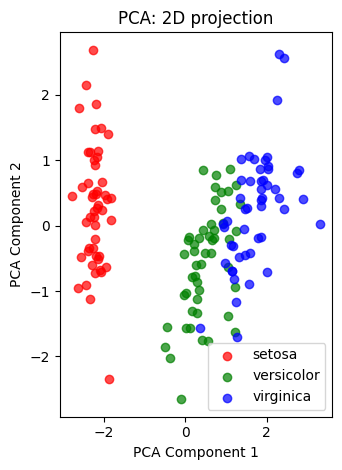

In [5]:
# Step 5: PCA for Comparison
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Visualization for PCA
plt.subplot(1, 2, 2)
for i, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.7, label=iris.target_names[i], color=color)
plt.title("PCA: 2D projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.tight_layout()
plt.show()

###Lab Exercise 2: LDA for Classification
Objective: Learn how LDA can be used as a classifier by applying it to a multi-class classification problem.

LDA Classification Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98


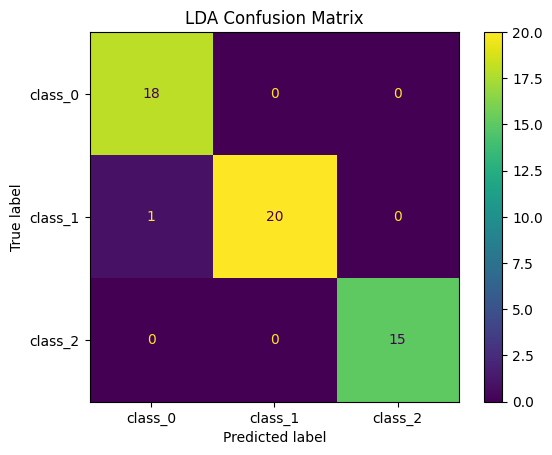

In [6]:
# Step 1: Load the Dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train an LDA Model
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Step 4: Evaluate the LDA Model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
cm_lda = confusion_matrix(y_test, y_pred_lda)

print("LDA Classification Metrics:")
print(f"Accuracy: {accuracy_lda:.2f}")
print(f"Precision: {precision_lda:.2f}")
print(f"Recall: {recall_lda:.2f}")

# Confusion Matrix for LDA
ConfusionMatrixDisplay(cm_lda, display_labels=wine.target_names).plot()
plt.title("LDA Confusion Matrix")
plt.show()




Logistic Regression Classification Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98


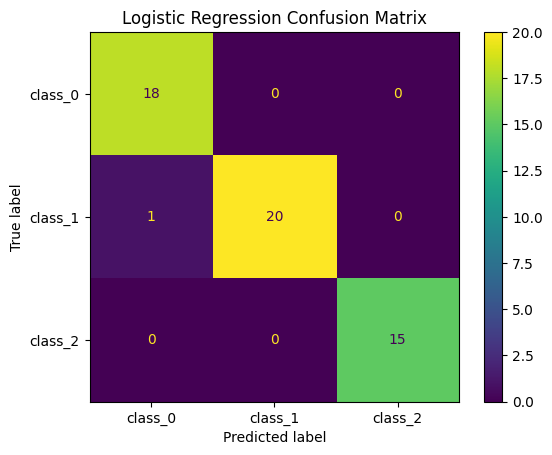

In [7]:
# Step 5: Compare with Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("\nLogistic Regression Classification Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay(cm_lr, display_labels=wine.target_names).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

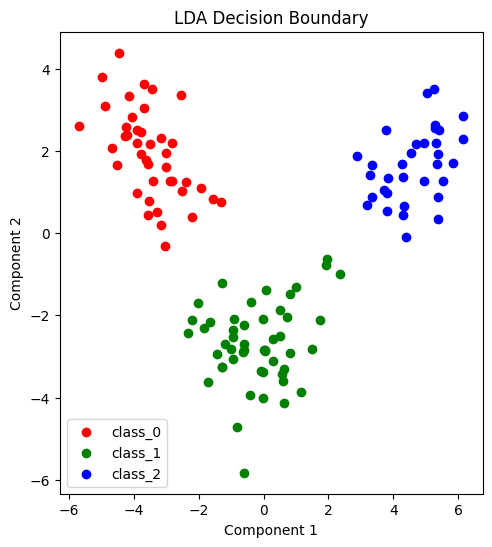

In [8]:
# Step 6: Visualize Decision Boundaries (Optional)
# Reduce to 2 dimensions with LDA for visualization
lda_2d = LDA(n_components=2)
X_train_2d = lda_2d.fit_transform(X_train, y_train)
X_test_2d = lda_2d.transform(X_test)

# Plotting decision boundaries for LDA
plt.figure(figsize=(12, 6))

# Plot LDA decision boundary
plt.subplot(1, 2, 1)
for i, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_train_2d[y_train == i, 0], X_train_2d[y_train == i, 1], label=wine.target_names[i], color=color)
plt.title("LDA Decision Boundary")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()


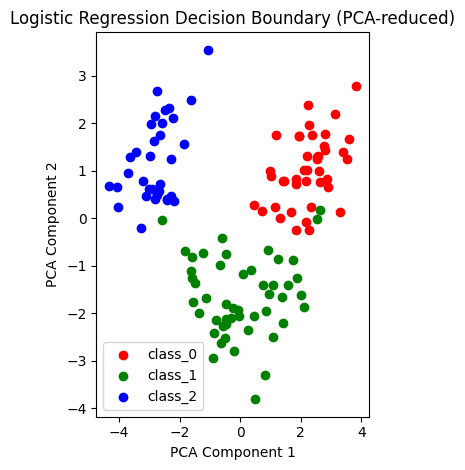

In [9]:
# Plotting decision boundaries for Logistic Regression
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

plt.subplot(1, 2, 2)
for i, color in zip(np.unique(y), ['r', 'g', 'b']):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=wine.target_names[i], color=color)
plt.title("Logistic Regression Decision Boundary (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.tight_layout()
plt.show()